<a href="https://colab.research.google.com/github/kunalk3/MNIST_digit_recognition_neural_network/blob/main/MNIST_Digit_Recognition(Multi_layer_Neural_Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- MNIST stands for "Modified National Institute of Standards and Technology". 
- It is a dataset of **70,000 handwritten images**. Each image is of **28x28 pixels** i.e. about **784 features**. 
- Each feature represents only one pixel’s intensity i.e. from 0(white) to 255(black). 
- This database is further divided into 60,000 training and 10,000 testing images.

## Import the libraries

In [ ]:
import tensorflow as tf                             
from matplotlib import pyplot as plt                        
import numpy as np

## Load the dataset

- The Keras library already contains some datasets such as CIFAR10, CIFAR100, Boston Housing price regression dataset, MNIST, IMDB movie review sentiment classification dataset etc.
- Out of the **70,000** images provided in the dataset, 60,000 are given for training and 10,000 are given for testing.

In [ ]:
from keras.datasets import mnist
objects=mnist

# The objects.load_data() method returns us the training data(train_img), its labels(train_lab) 
# and also the testing data(test_img) and its labels(test_lab).
(train_img,train_lab),(test_img,test_lab)=objects.load_data()

11493376/11490434 [==============================] - 0s 0us/step


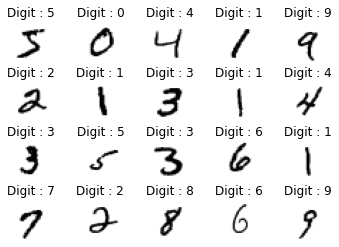

In [ ]:
# we first displayed the first 20 images of the training set
for i in range(20):
  plt.subplot(4,5,i+1)

  # cmap controls the colour map used to display the values. cmap=‘gray’ will display image as grayscale while 
  # cmap=‘gray_r’ is used to display image as inverse grayscale.
  plt.imshow(train_img[i],cmap='gray_r')
  plt.title("Digit : {}".format(train_lab[i]))
  
  # In order to change the space provided between two rows, we have used hspace. 
  # If you want to change space between two columns then you can use wspace.
  plt.subplots_adjust(hspace=0.5)

  # In order to hide the axis of the image, plt.axis(‘off’) has been used.
  plt.axis('off')

- (60000,28,28) means there are 60,000 images in the training set and each image is of size 28x28 pixels.
- So each image is of size 28x28 i.e. 784 features, and each feature represents the intensity of each pixel from 0 to 255.

In [ ]:
print('Training images shape : ',train_img.shape)
print('Testing images shape : ',test_img.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


- use print(**train_img[0]**) to print the first training set image in the matrix form of 28x28.

In [ ]:
print('How image looks like : ')
print(train_img[0])

How image looks like : 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

- hist() is used to plot the histogram for the first training image i.e. train_img[0]. 
- The image has been reshaped into a **1-D array** of size 784. facecolor is an optional parameter which specifies the colour of the histogram.
- Title of the histogram, Y-axis and X-axis have been named as “Pixel vs its intensity”, “PIXEL” and “Intensity”.

Text(0.5, 0, 'Intensity')

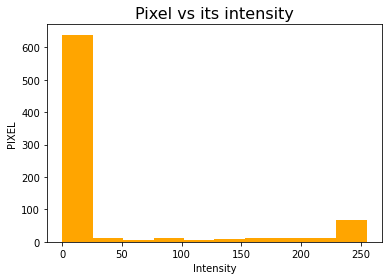

In [ ]:
# We plotted the first training image on a histogram. (Before normalisation)
plt.hist(train_img[0].reshape(784),facecolor='orange')
plt.title('Pixel vs its intensity',fontsize=16)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')

## Pre-process the data

- **Normalizing** the input data helps to speed up the training. Also, it reduces the chance of getting stuck in local optima, since we’re using **stochastic gradient descent** to find the optimal weights for the network.
- The pixel values are between 0 and 255. So, scaling of input values is good when using neural network models since the scale is well known and well behaved, we can very quickly normalize the pixel values to the range 0 and 1 by dividing each value by the maximum intensity of 255.

In [ ]:
# Normalizing the data
train_img=train_img/255.0
test_img=test_img/255.0

In [ ]:
print('How image looks like after normalising: ')
print(train_img[0])

How image looks like after normalising: 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0. 

Text(0.5, 0, 'Intensity')

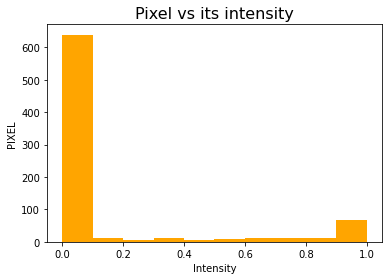

In [ ]:
# After normalisation
plt.hist(train_img[0].reshape(784),facecolor='orange')
plt.title('Pixel vs its intensity',fontsize=16)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')

## Creating the model

- The Sequential model is very straightforward and simple. It allows to build a model layer by layer.
- **Sequential()** is used to create a layer of the network in sequence.
- **.add()** is used here to add the layer into the model.
- In the first layer(input layer), we feed image as the input. Since each image is of size 28x28, hence we have used **Flatten()** to compress the input.
- We have used **Dense()** in the other layers. It ensures that each neuron in the previous layer is connected to every neurone in the next layer.
- The model is a simple neural network with **two hidden layers** with **512 neurons**. 
- A rectifier linear unit activation (**ReLU**) function is used for the neurons in the hidden layers. The nicest thing about it is that its gradient is always equal to 1, this way we can pass the maximum amount of the error through the network during back-propagation.
- The output layer has **10 neurons** i.e. for each class from 0 to 9. A **softmax** activation function is used on the output layer to turn the outputs into probability-like values.

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
model=Sequential()
input_layer= Flatten(input_shape=(28,28))
model.add(input_layer)
hidden_layer1=Dense(512,activation='relu')
model.add(hidden_layer1)
hidden_layer2=Dense(512,activation='relu')
model.add(hidden_layer2)
output_layer=Dense(10,activation='softmax')
model.add(output_layer)

## Compiling the network

- Compiling the model takes three parameters: optimizer, loss and metrics. 
- The optimizer controls the **learning rate**. We are using **‘adam’** as our optimizer.
- We will use ‘**Sparse_Categorical_Crossentropy**’ for our **loss function** because it saves time in memory as well as computation since it simply uses a single integer for a class, rather than a whole vector. A lower score indicates that the model is performing better.

In [ ]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## Train the model

- We will train the model with the help of **fit()** function.
- The number of **epochs** is the number of times the model will cycle through the data.

In [ ]:
model.fit(train_img,train_lab,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3140 - accuracy: 0.9079
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0821 - accuracy: 0.9743
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0513 - accuracy: 0.9844
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0398 - accuracy: 0.9874
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0333 - accuracy: 0.9895
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0264 - accuracy: 0.9914
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0234 - accuracy: 0.9931
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0211 - accuracy: 0.9929
Epoch 9/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0197 - accuracy: 0.9939
Epoch 10/100
1875/1875 [==============================] - 3s 2ms/step - l

In [ ]:
# save the model as project.h5
model.save('project.h5')

## Evaluate the model

- **model.evaluate()** method computes the loss and any metric defined when compiling the model.
- **Verbose** can be either 0,1, or 2. By default verbose is 1.
 - verbose = 0, means silent.
 - verbose = 1, which includes both progress bar and one line per epoch.
 - verbose = 2, one line per epoch i.e. epoch no./total no. of epochs.

In [ ]:
loss_and_acc=model.evaluate(test_img,test_lab,verbose=2)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 - 0s - loss: 0.5363 - accuracy: 0.9826
Test Loss 0.5363403558731079
Test Accuracy 0.9825999736785889


- **model.predict()** is used to do prediction on the testing set.
- **np.argmax()** returns the indices of the maximum values along an axis.

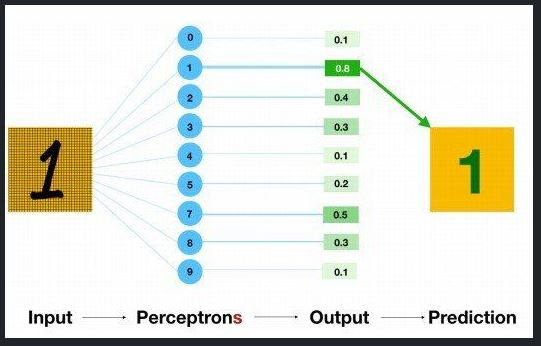

## Predictions check

Predicted Value:  7
Successful prediction


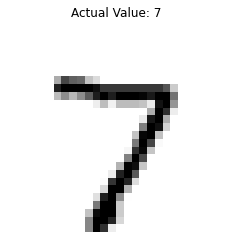

In [ ]:
plt.imshow(test_img[0],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[0]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[0]))
if(test_lab[0]==(np.argmax(prediction[0]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

Predicted Value:  2
Successful prediction


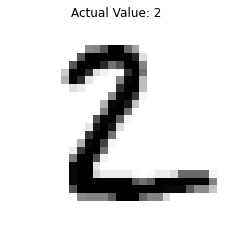

In [ ]:
plt.imshow(test_img[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[1]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(test_lab[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

Predicted Value:  1
Successful prediction


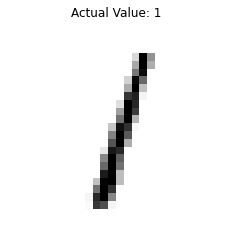

In [ ]:
plt.imshow(test_img[2],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[2]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[2]))
if(test_lab[2]==(np.argmax(prediction[2]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

## Our own digit predictions check

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

- Above function converts the image into an array of pixels which is fed to the model as an input.

In [ ]:
# In order to upload a file from local drive
from google.colab import files
uploaded = files.upload()

Saving 5img.jpg to 5img.jpg


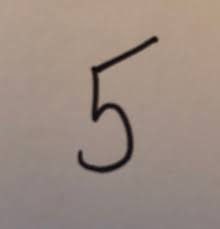

In [ ]:
# Give the uploaded file name in below line
from IPython.display import Image
Image('5img.jpg',width=250,height=250)

In [ ]:
# Checking the predictions for image based on trained model
img = load_image('5img.jpg')
digit=model.predict(img)
print('Predicted value : ',np.argmax(digit))

Predicted value :  5


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [ ]:
from IPython.display import Image
img1 = Image('5_img.JPG')
img2 = Image('3_img.JPG')

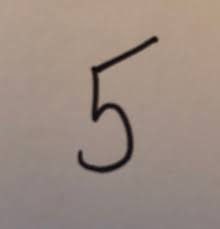

In [ ]:
img1

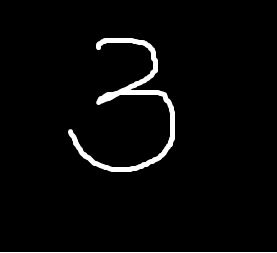

In [ ]:
img2

In [ ]:
img = load_image('3_img.JPG') 
digit=model.predict(img)
print(np.argmax(digit))

3


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


***End of code***